# <center>Exploring the Acceptance Rate of Coupons</center>

<a id="0"></a> <br>
 
 # Table of Contents  
1. [Introduction](#1)     
    1. [1.1 Problem Statement](#2) <br>
    1. [1.2 Objectives](#3) <br>
    1. [1.3 Data](#4) 
1. [Data Preperation](#5)    
    1. [2.1 Feature Selection](#6)     
    1. [2.2 Dropping Missing Values](#7)    
    1. [2.3 Data Transformation](#8) <br>
    1. [3.4 Revisiting the Data & Dropping False Data](#9) 
1. [Descriptive and Exploraroty Data Analysis](#10)       
    1. [3.1 Descriptive Analysis](#11)     
    1. [3.2 Correlation Studies](#12)         
        1. [3.2.1 Income vs Age & Marital Status](#13)   
        1. [3.2.2 Occupation vs Income](#14) 
        1. [3.2.3 Income & Voucher Acceptance](#15) 
        1. [3.2.4 Occupation & Voucher Acceptance](#16) 
        1. [3.2.5 Frequency of Visits & Voucher Acceptance](#17)
1. [Predictive Models](#18)  
    1. [4.1 Importing ML Libraries](#19)     
    1. [4.2 Model #1 - Decision Tree Model](#20)
    1. [4.3 Model #2 - Random Forest Model](#21)
    1. [4.4 Model #3 - K Nearest Neighbors Model](#22)
    1. [4.5 Evaluations and Insights](#23)
1. [Conclusion and Business Recommendations](#24)  
    1. [5.1 Conclusion](#25) 
    1. [5.2 Recommendations](#26) 
    1. [5.3 Next Steps](#27)     
1. [References](#28) 
1. [Appendix](#29) 

<a id=1></a>
# <center>1. Introduction</center>

<a id=2></a>
## 1.1 Problem Statement
Nowadays, coupons are still one of the most important promotional tools for businesses. Numerous local businesses, such as restaurants, cafés, and bars, would routinely issue coupons to consumers to attract customers and boost sales. However, the proliferation of coupons and the decline in their redemption rate have resulted in a growing concern for businesses about the effectiveness of coupons. <br>Therefore, determining the targeted groups for coupon promotions and forecasting consumer behaviour towards coupon acceptance is critical to evaluating coupon strategies. With this in mind, we initiated the analysis to investigate the characteristics of the population that is more likely to accept coupons and allow coupon providers to target the desired audience strategically.

<a id=3></a>
## 1.2 Objectives
The aim of this report is to __investigate the charasteristics of people that are more likely to accept the coupons__, and allow coupon providers to strategically target the desired audience.

The dataset will be __cleaned__ to ensure the accuracy and quality of data. __Exploratory data analysis__ will then be conducted to investigate the dataset and summarise the main features, as well as any potential relationship between attributes. Afterwards, __two predictive models__ will be created to predict coupons acceptance based on consumer characteristics. Finally, appropriate __business recommendations__ will be presented, along with the better-performing model.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import missingno as mn # if opened in new environment/server, need to manually install package in terminal
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import seaborn as sns

# Machine learning libraries imported in section 4 of the report - 'Predictive Model'

<a id=4></a>
## 1.3 Data
The dataset is from the UCI Machine Learning Repository, uploaded by Dr. Tong Wang from University of Iowa and Dr. Cynthia Rudin from Duke University. 
The dataset includes 12684 entires with a total of 26 attributes, qualitative and quantitative.

In [2]:
FilePath = "https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation"

df = pd.read_csv('./Data/in-vehicle-coupon-recommendation.csv')
display(df.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<a id=5></a>
# <center>2. Data Preperation</center>

<a id=6></a>
## 2.1 Feature Selection

Since the study is about how passangers' characteristics affect the acceptance rate of coupons, all irrelevant columns are dropped.

In [4]:
#For most of the data cleansing and data trasnformation process, __functions are written__ for future implementation.

# function that drop columns
def dropColumn(columns):
    df.drop(columns, axis=1, inplace=True)

dropColumn(['destination', 'weather', 'temperature', 'time', 'car', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   passanger             12684 non-null  object
 1   coupon                12684 non-null  object
 2   expiration            12684 non-null  object
 3   gender                12684 non-null  object
 4   age                   12684 non-null  object
 5   maritalStatus         12684 non-null  object
 6   has_children          12684 non-null  int64 
 7   education             12684 non-null  object
 8   occupation            12684 non-null  object
 9   income                12684 non-null  object
 10  Bar                   12577 non-null  object
 11  CoffeeHouse           12467 non-null  object
 12  CarryAway             12533 non-null  object
 13  RestaurantLessThan20  12554 non-null  object
 14  Restaurant20To50      12495 non-null  object
 15  direction_same        12684 non-null

<a id=7></a>
## 2.2 Dropping missing values

There are five columns that contains missing values. After dropping out all the null values, there are still sufficient amount of entries for data analysis.

<AxesSubplot:>

passanger                 0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
direction_same            0
direction_opp             0
Y                         0
dtype: int64

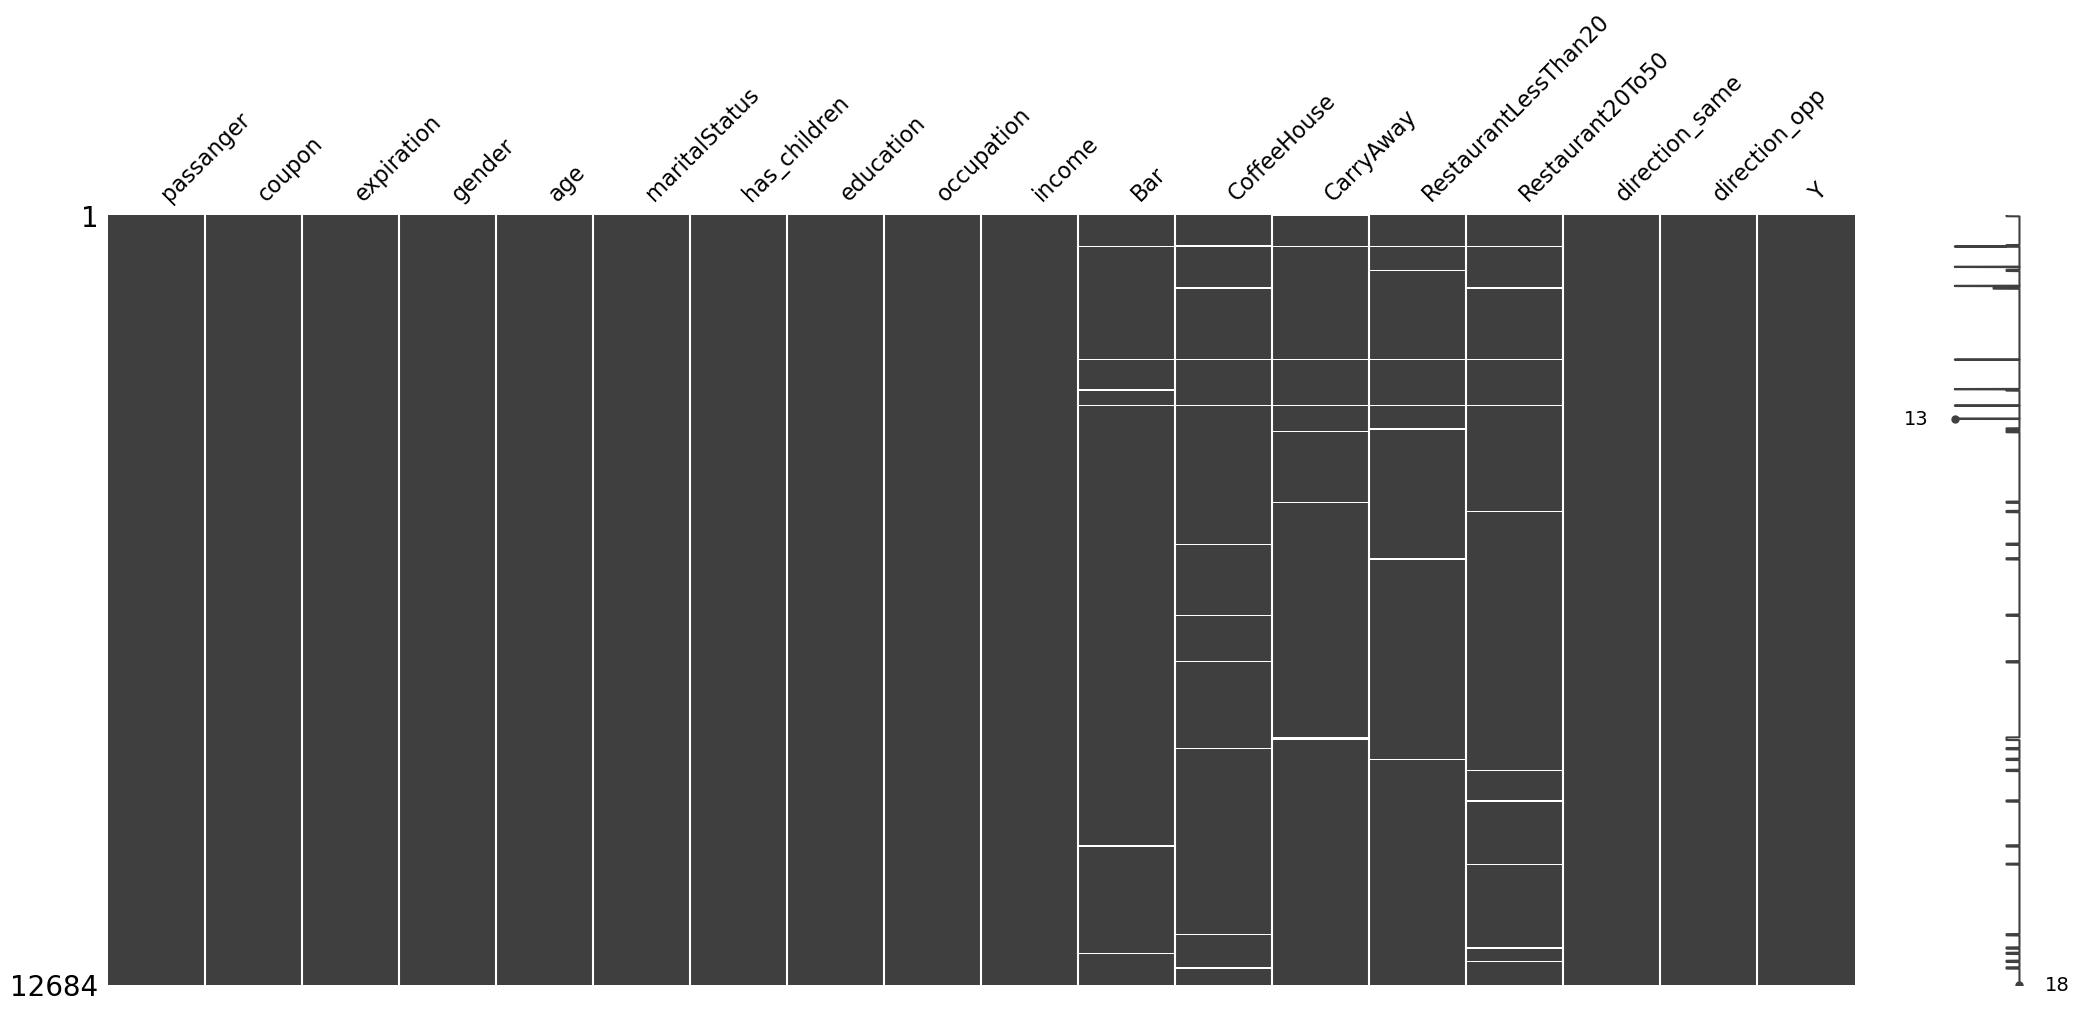

In [5]:
mn.matrix(df); #this is from the 'missingno' library for exploratory visualisation of missing values
# if opened in new environment/server, need to manually install package in terminal

display(df.isnull().sum())

#### <center>Figure1.1 Missingno Matrix</center>

Now there are no missing values left, and the matrix looks consistent.

<AxesSubplot:>

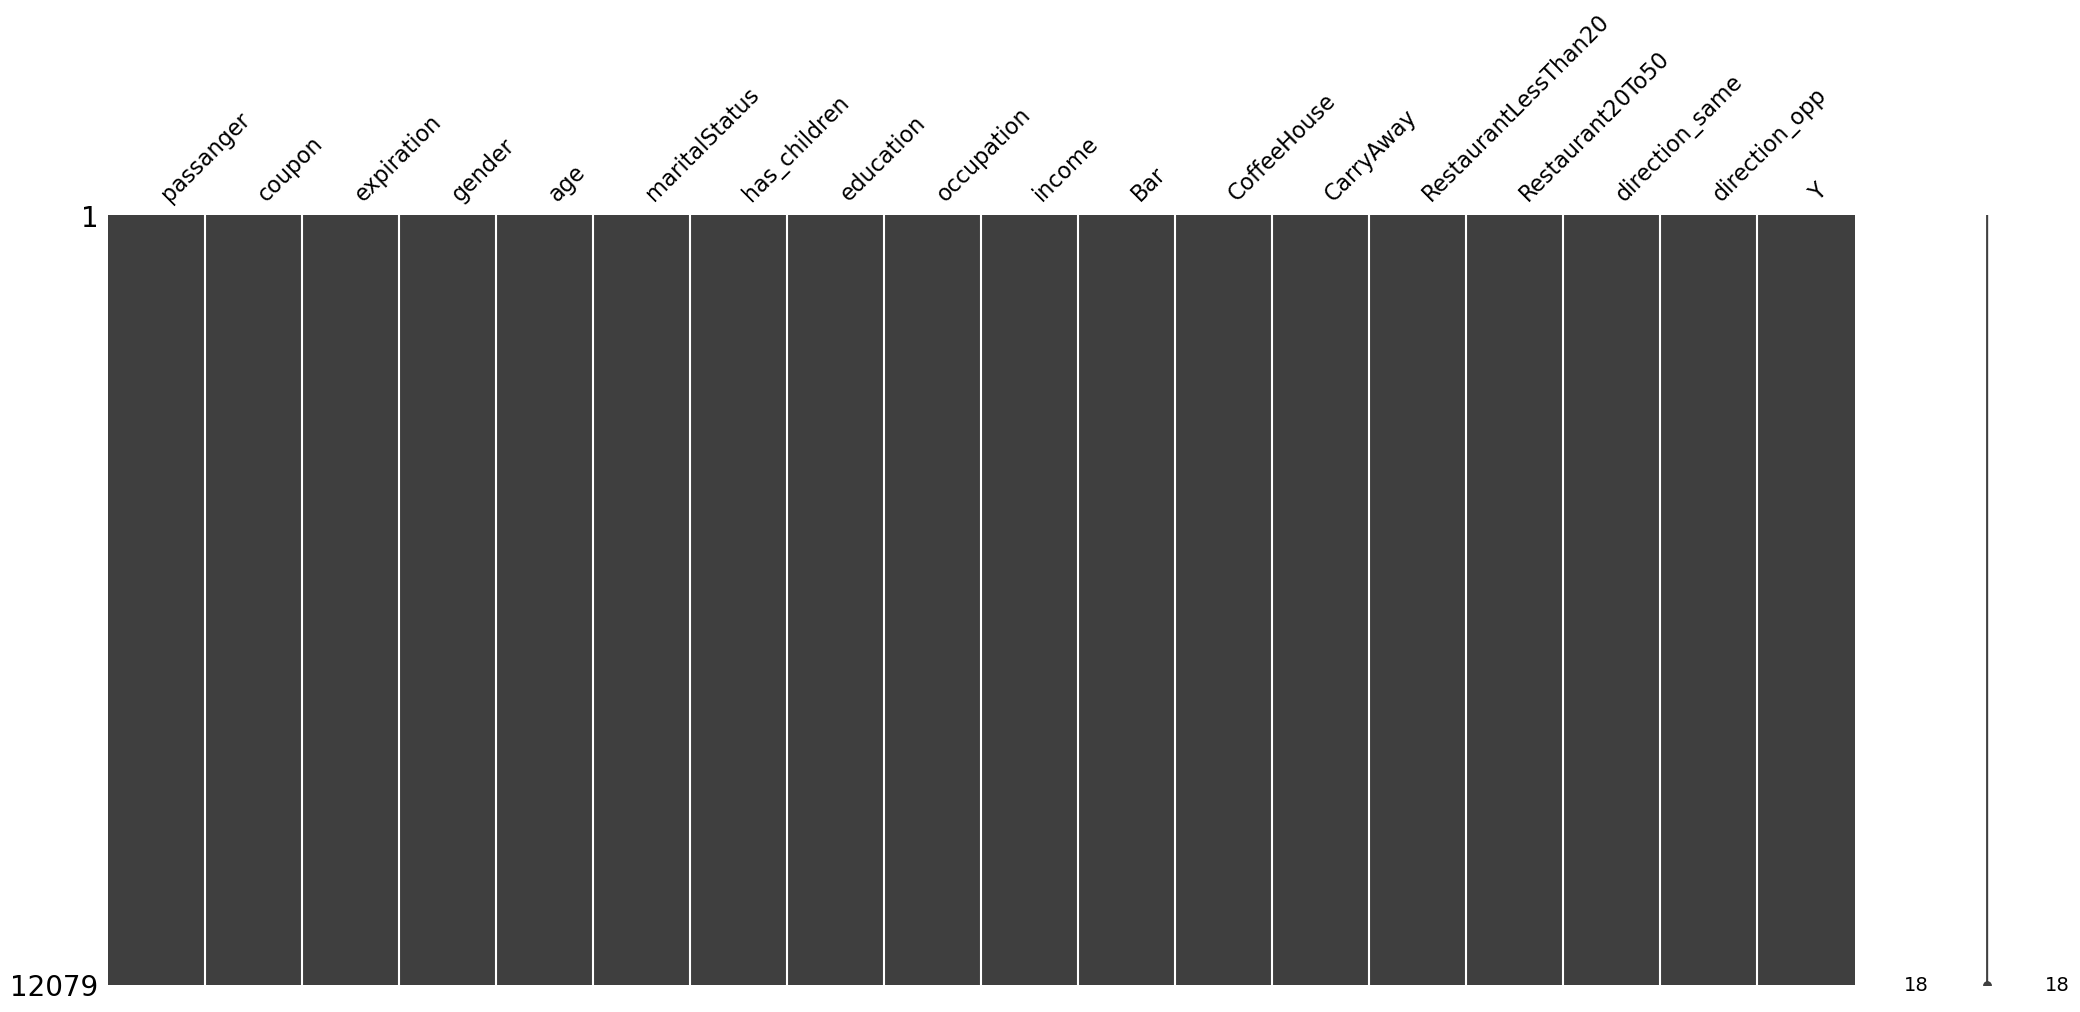

In [6]:
df.dropna(inplace=True)
mn.matrix(df)

#### <center>Figure1.2 Missingno Matrix after dropping null values</center>

<a id=8></a>
## 2.3 Data Transformation

At this step, variables are updated to the __same unit__, and __continuous and range variables are discretised__ to its mean value to better analyse the data, and some variables are __renamed for better understanding__.

In [7]:
# for simple variable update
def renameVariable(column, toReplace, value):
    df[column].replace(toReplace, value, inplace=True)
    
# for variable replacement with multiple conditions, and can be apllied to attributes with same list of variables
def renameRestaurantFreq(column):
    df.loc[df[column] == 'never', column] = 0
    df.loc[df[column] == 'less1', column] = 1
    df.loc[df[column] == '1~3', column] = 2
    df.loc[df[column] == '4~8', column] = 6
    df.loc[df[column] == 'gt8', column] = 8

# change yes and no to numerical values
def renameYesNo(column):
    df.loc[df[column] == 0, column] = 'yes'
    df.loc[df[column] == 1, column] = 'no'
    
# change income attributes from object to numerical values
def renameIncome(column): 
    df.loc[df[column] == 'Less than $12500', column] = 6250
    df.loc[df[column] == '$12500 - $24999', column] = 18750
    df.loc[df[column] == '$25000 - $37499', column] = 31250
    df.loc[df[column] == '$37500 - $49999', column] = 43750
    df.loc[df[column] == '$50000 - $62499', column] = 56250
    df.loc[df[column] == '$62500 - $74999', column] = 68750
    df.loc[df[column] == '$75000 - $87499', column] = 81250
    df.loc[df[column] == '$87500 - $99999', column] = 93750
    df.loc[df[column] == '$100000 or More' , column] = 100000

In [8]:
renameVariable('expiration', '1d', 24)
renameVariable('expiration', '2h', 2)

renameVariable('gender', 'Male', 0)
renameVariable('gender', 'Female', 1)

renameVariable('age', 'below21', 20)
renameVariable('age', '50plus', 50)

renameRestaurantFreq('Bar')    
renameRestaurantFreq('CoffeeHouse')  
renameRestaurantFreq('CarryAway')  
renameRestaurantFreq('RestaurantLessThan20')  
renameRestaurantFreq('Restaurant20To50')  

renameYesNo('direction_same')
renameYesNo('direction_opp')

renameIncome('income')

In [9]:
# use apply function along with pd.to_numeric() to change datatype of multiple columns
df[["expiration", "age", "income", "Y", "Bar", "CoffeeHouse", 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = df[["expiration", "age", "income", "Y", "Bar", "CoffeeHouse", 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].apply(pd.to_numeric)

In [10]:
display(df.head())
display(df.info())

,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
22,Alone,Restaurant(<20),24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
23,Friend(s),Coffee House,2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
24,Friend(s),Bar,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
25,Friend(s),Carry out & Take away,2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
26,Friend(s),Coffee House,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   passanger             12079 non-null  object
 1   coupon                12079 non-null  object
 2   expiration            12079 non-null  int64 
 3   gender                12079 non-null  int64 
 4   age                   12079 non-null  int64 
 5   maritalStatus         12079 non-null  object
 6   has_children          12079 non-null  int64 
 7   education             12079 non-null  object
 8   occupation            12079 non-null  object
 9   income                12079 non-null  int64 
 10  Bar                   12079 non-null  int64 
 11  CoffeeHouse           12079 non-null  int64 
 12  CarryAway             12079 non-null  int64 
 13  RestaurantLessThan20  12079 non-null  int64 
 14  Restaurant20To50      12079 non-null  int64 
 15  direction_same        12079 non-nul

None

<a id=9></a>
## 2.4 Revisit Data & Dropping False Data

After some studies were done with the dataset, we noted that there are **some data that appears to be false data**(as shown in the table below). Around **1400 survey respondents** indicated that they are **unemployed, while their income is much higher than the unemployed insurance in the USA**, which is \\$40 to \\$450 per week as stated by the Employement Development Department (State of California Government), and the national average payment was \\$378, which amounts to **\\$18144 yearly** (Wikipedia). 

As such, another round of data cleansing is performed to drop all the false data.

In [11]:
df_filtered = df[(df['occupation'] == 'Unemployed') & (df['income'] >= 18144)]       
display(df_filtered)

,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
132,Alone,Restaurant(<20),24,1,26,Married partner,1,Some college - no degree,Unemployed,68750,0,1,8,6,0,yes,no,1
133,Friend(s),Coffee House,2,1,26,Married partner,1,Some college - no degree,Unemployed,68750,0,1,8,6,0,yes,no,1
134,Friend(s),Carry out & Take away,2,1,26,Married partner,1,Some college - no degree,Unemployed,68750,0,1,8,6,0,yes,no,1
135,Friend(s),Coffee House,2,1,26,Married partner,1,Some college - no degree,Unemployed,68750,0,1,8,6,0,yes,no,1
136,Friend(s),Coffee House,24,1,26,Married partner,1,Some college - no degree,Unemployed,68750,0,1,8,6,0,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12629,Partner,Carry out & Take away,24,1,21,Unmarried partner,0,Bachelors degree,Unemployed,43750,0,6,2,2,1,no,yes,1
12630,Alone,Carry out & Take away,24,1,21,Unmarried partner,0,Bachelors degree,Unemployed,43750,0,6,2,2,1,yes,no,1
12631,Alone,Coffee House,24,1,21,Unmarried partner,0,Bachelors degree,Unemployed,43750,0,6,2,2,1,no,yes,1
12632,Alone,Bar,24,1,21,Unmarried partner,0,Bachelors degree,Unemployed,43750,0,6,2,2,1,yes,no,0


In [12]:
df.drop(df[(df.occupation == "Unemployed") & (df.income > 18144)].index, inplace=True)

Now there are no more false data left

In [13]:
df[(df['occupation'] == 'Unemployed') & (df['income'] >= 18144)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   passanger             0 non-null      object
 1   coupon                0 non-null      object
 2   expiration            0 non-null      int64 
 3   gender                0 non-null      int64 
 4   age                   0 non-null      int64 
 5   maritalStatus         0 non-null      object
 6   has_children          0 non-null      int64 
 7   education             0 non-null      object
 8   occupation            0 non-null      object
 9   income                0 non-null      int64 
 10  Bar                   0 non-null      int64 
 11  CoffeeHouse           0 non-null      int64 
 12  CarryAway             0 non-null      int64 
 13  RestaurantLessThan20  0 non-null      int64 
 14  Restaurant20To50      0 non-null      int64 
 15  direction_same        0 non-null      object
 16  di

<a id=10></a>
# <center>3. Descriptive and Exploratory Data Analysis</center>

<a id=11></a>
## 3.1 Descriptive Analysis

After data preparation, we can start the descriptive and exploratory analysis now.
Based on the previous definition, we first need to find the relevance of the 9 characteristics of people to whether the coupon is accepted or not.

In [14]:
display(df.describe())

,expiration,gender,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,14.273706,0.490218,32.710662,0.404662,51533.979219,1.445849,2.375176,4.014322,3.621455,1.522325,0.575587
std,10.926520,0.499928,10.293314,0.490849,30821.608785,1.976112,2.583529,2.555851,2.471806,1.586235,0.494277
min,2.000000,0.000000,20.000000,0.000000,6250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,26.000000,0.000000,31250.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,24.000000,0.000000,31.000000,0.000000,43750.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
75%,24.000000,1.000000,41.000000,1.000000,81250.000000,2.000000,2.000000,6.000000,6.000000,2.000000,1.000000
max,24.000000,1.000000,50.000000,1.000000,100000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


Looking at the statistical data, the majority of survey respondents are aged around 32 years old, with an average income level of \\$51500 per year. Carry away is the most frequently visited local business type, with bars being the least.
<br>Overall, there are slightly more people who accepted the voucher.

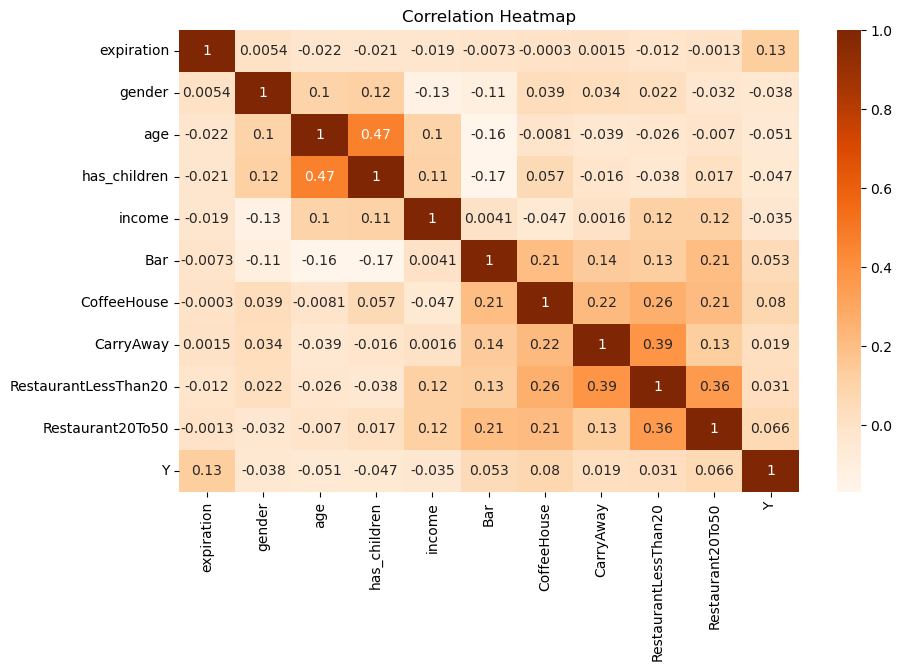

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax, cmap="Oranges") 

ax.set_title('Correlation Heatmap'); # using semicolon to prevent output of statement

#### <center>Figure 2. Heatmap of Attributes Correlation</center>

According to Figure 2, we can see that the only significant relationships are age vs has children, and the frequency of CarryAway visits vs frequency of Restuarant visits.
<br>However, there are no other relationships between any of the attributes with coupon acceptance. Hence, further analysis are conducted to dive deeper to any potential correlations.

<a id=12></a>
## 3.2 Correlation Studies

In [16]:
# set style sheet for consistent plot style throughout the section
plt.style.use('seaborn-darkgrid')

<a id=13></a>
### 3.2.1 Income vs Age & Marital Status

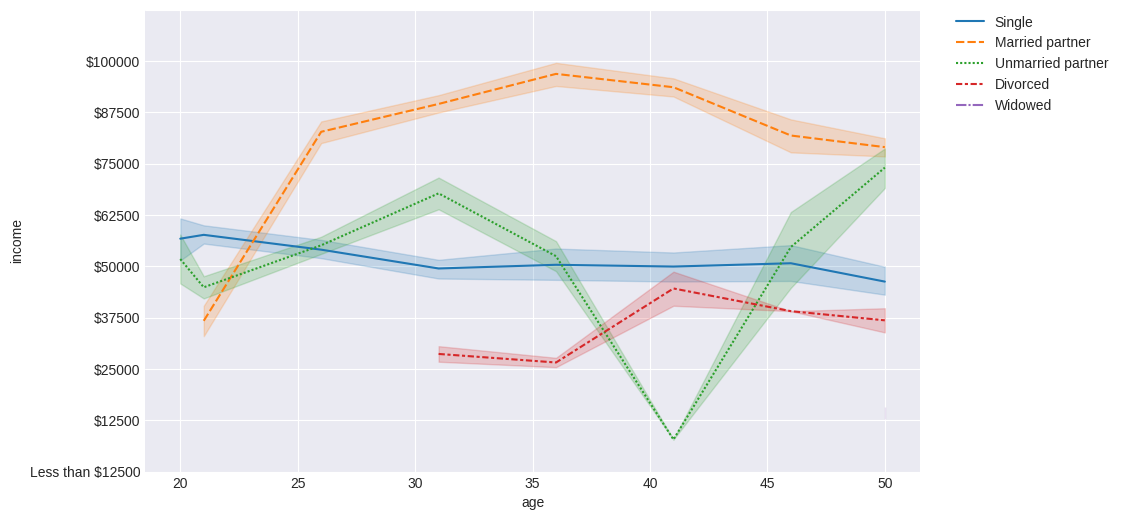

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df, x='age', y='income', hue='maritalStatus', style='maritalStatus')

# list to rename the tick labels on y axis
income_label = ['Less than \\$12500', '\\$12500', '\\$25000', '\\$37500', '\\$50000', '\\$62500', '\\$75000', '\\$87500', '\\$100000', '']

# rename y tick lables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(income_label)

# reposition legend box
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0);

#### <center>Figure 3. Income Level by Age, grouped by marital status</center>

All the survey respondents were divided into 5 segments according to their marital status: single, married partner, unmarried partner, divorced, and widowed.

Referring to figure 3, we can observe that the income of single status is relative stable, ranging from \\$56000 to \\$50000. Married partner has the highest average income amongst the all income groups, and they reach their top income (\\$100,000) at about 36 years old. Unmarried partners have the greatest volatility in income, with the lowest point of \\$ 10,000 at age 41 and highest point at age 50 at around \\$75,000. The Divorced population have the lowest average income, around \\$37,500. Also, because of the insufficient data on the widowed population, it cannot be displayed in the visualisation graph.

<a id=14></a>
### 3.2.2 Occupation vs Income

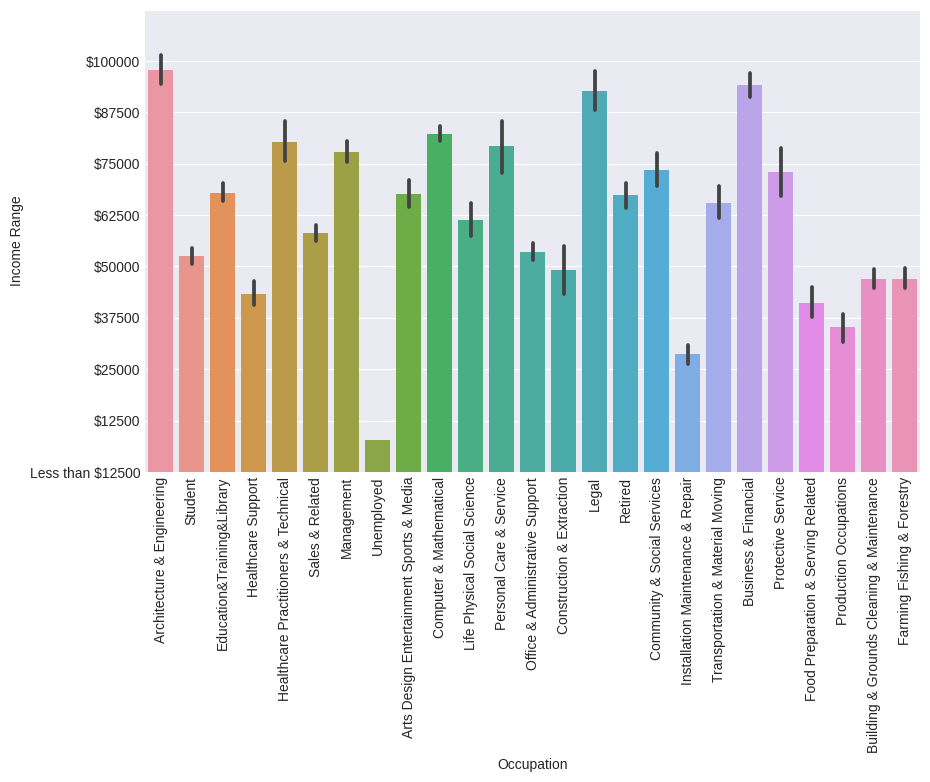

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# create seaborn bar chart
sns.barplot(data=df, x='occupation', y='income')

# rename title on x and y axis
ax.set_xlabel('Occupation')
ax.set_ylabel('Income Range')

# rename y tick labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(income_label)

#prevent labels from overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10);

#### <center>Figure 4. Income by Occupation</center>

Figure 4 clearly shows that the top three occupation types in terms of yearly earnings are: Architecture & Engineering, Business & Financial, and Legal.

<a id=15></a>
### 3.2.3 Income vs Voucher Acceptance

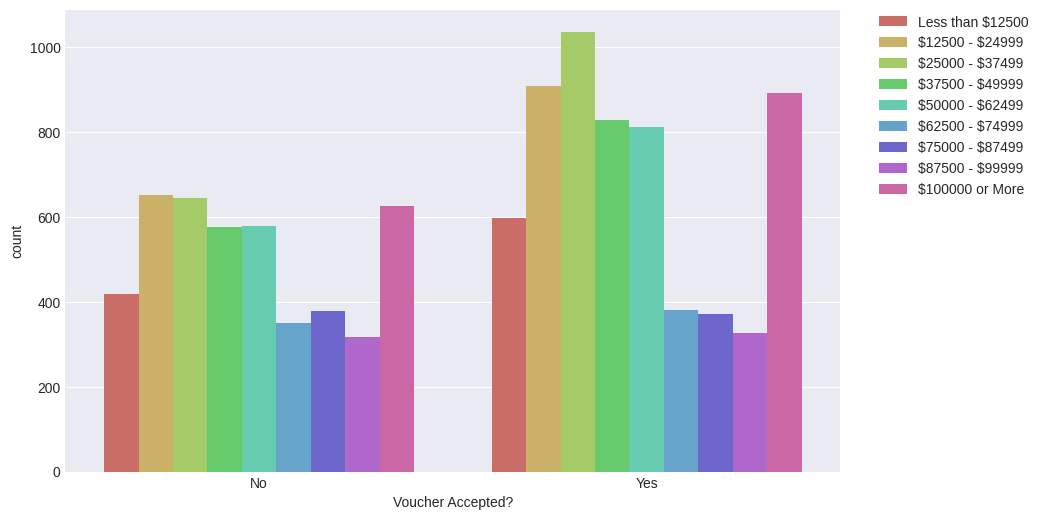

In [19]:
#creating the category order for better visualisation
cat_order = ['Less than $12500', '\\$12500 - \\$24999', '\\$25000 - \\$37499', '\\$37500 - \\$49999', '\\$50000 - \\$62499', '\\$62500 - \\$74999', '\\$75000 - \\$87499', '\\$87500 - \\$99999', '$100000 or More']

fig, ax = plt.subplots(figsize=(10, 6))

#creating the countplot
ax = sns.countplot(data=df, x='Y', hue='income', palette='hls')

# rename title on x axis
plt.xlabel('Voucher Accepted?'); 

# rename x tick labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(['No', 'Yes'])

# reposition legend box
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0, labels=cat_order); #place legend outside of graph

# using annotate function to add counts for each bar in the countplot - used when analysing graph
#for p in ax.patches:
#    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.043, p.get_height()+0.5), ha='center', va='bottom', color='black', size=10);

#### <center>Figure 5. Voucher Acceptance by Income</center>

In [20]:
# counting number of people in each income level
income_count = df['income'].value_counts().sort_index(ascending=False)
# renaming row index for easier interpretation
income_count = income_count.rename({6250:'Less than $12500', 18750:'$12500 - $24999', 31250:'$25000 - $37499', 43750:'$37500 - $49999', 56250:'$50000 - $62499', 68750:'$62500 - $74999', 81250:'$75000 - $87499', 93750:'$87500 - $99999', 100000:'$100000 or More'})
display(income_count)

$100000 or More     1517
$87500 - $99999      643
$75000 - $87499      748
$62500 - $74999      730
$50000 - $62499     1389
$37500 - $49999     1403
$25000 - $37499     1681
$12500 - $24999     1558
Less than $12500    1014
Name: income, dtype: int64

Then we analyzed the correlation between income level and degree of coupon acceptance. 

Figure 5 shows that those within the __income range of _\\$25000 ~ \\$37499_ accepted the most coupons__. If we combine it with the number of respondents in each income level category (as shown above), around 62%(1036/1681) of people at this income level accepted the coupon given out. Interestingly, __892 people at the _"\\$100000 or above"_ income level accepted the coupon__. That is about 59%, which is just slightly less than the _"\\$25000 ~ \\$37499"_ income level. We did not expect this result before conducting data analysis, which is an interesting insight.

Overall, The __total number of accepted coupon is significantly higher__ than coupon not accepted, and people who fall under __medium and medium-low income level are more likely to accept coupons__, as well as people with extremly high yearly salaries.

<a id=16></a>
### 3.2.4 Occupation vs Voucher Acceptence

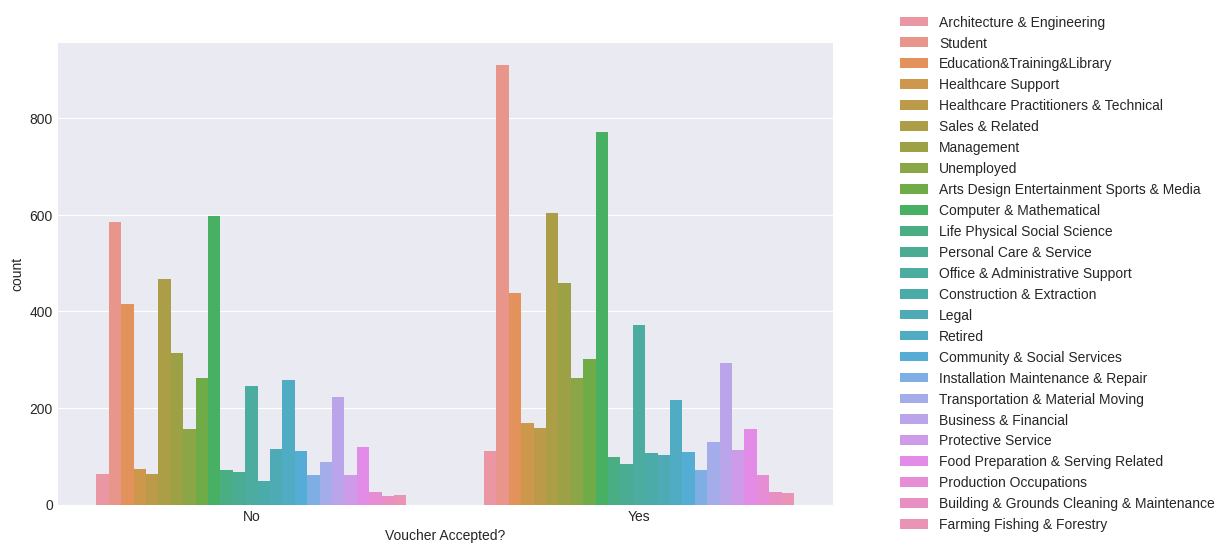

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

# create seaborn counplot
sns.countplot(data=df, x='Y', hue='occupation')

# rename title on x axis
plt.xlabel('Voucher Accepted?')

# rename x tick labels
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(['No', 'Yes']);

# reposition legend box
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='right', borderaxespad=0);

#### <center>Figure 6. Voucher Accepted by Occupation</center>

Based on Figure 6, students and employees in Computer & Mathematical workfield accepted the most coupons, followed by other occupations such as 'Sales & Related', 'Management', and 'Education/Training/Library'.

Interestingly, people who retired are the only one amongst all the occupations who had more people that rejected the vouchers than accepted.

<a id=17></a>
### 3.2.5 Frequency of Visits vs Voucher Acceptance

The dataframe is then __split into five dataframes__ based on the type of coupon that is being given out. 

In addition to data analysis, the five dataframes will also be used for the next section of the report, where the predictive models will be applied to each types of coupon for better interpretation ofresults.

In [22]:
# create five new dataframes that splits the original dataframe based on the type of coupon given out
Bar_df = df[df['coupon'] == 'Bar']
CoffeeHouse_df = df[df['coupon'] == 'Coffee House']
Takeaway_df = df[df['coupon'] == 'Carry out & Take away']
Restaurantlessthan20_df = df[df['coupon'] == 'Restaurant(<20)']
Restaurantbetween2050_df = df[df['coupon'] == 'Restaurant(20-50)']

display(Bar_df.head(), CoffeeHouse_df.head(), Takeaway_df.head(), Restaurantlessthan20_df.head(), 
        Restaurantbetween2050_df.head())

,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
24,Friend(s),Bar,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
35,Alone,Bar,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,no,yes,1
39,Alone,Bar,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
46,Friend(s),Bar,24,0,46,Single,0,Some college - no degree,Student,18750,0,6,2,2,0,yes,no,0
57,Alone,Bar,24,0,46,Single,0,Some college - no degree,Student,18750,0,6,2,2,0,no,yes,0


,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
23,Friend(s),Coffee House,2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
26,Friend(s),Coffee House,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
27,Friend(s),Coffee House,2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
28,Friend(s),Coffee House,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
30,Friend(s),Coffee House,2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0


,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
25,Friend(s),Carry out & Take away,2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
33,Friend(s),Carry out & Take away,24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
41,Alone,Carry out & Take away,2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,no,yes,1
47,Friend(s),Carry out & Take away,2,0,46,Single,0,Some college - no degree,Student,18750,0,6,2,2,0,yes,no,1
55,Friend(s),Carry out & Take away,24,0,46,Single,0,Some college - no degree,Student,18750,0,6,2,2,0,yes,no,1


,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
22,Alone,Restaurant(<20),24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
29,Friend(s),Restaurant(<20),24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
31,Friend(s),Restaurant(<20),2,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
42,Alone,Restaurant(<20),24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,1
44,Alone,Restaurant(<20),24,0,46,Single,0,Some college - no degree,Student,18750,0,6,2,2,0,yes,no,1


,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
36,Alone,Restaurant(20-50),24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
40,Alone,Restaurant(20-50),24,0,21,Single,0,Bachelors degree,Architecture & Engineering,68750,0,1,6,6,1,yes,no,0
58,Alone,Restaurant(20-50),24,0,46,Single,0,Some college - no degree,Student,18750,0,6,2,2,0,yes,no,0
62,Alone,Restaurant(20-50),24,0,46,Single,0,Some college - no degree,Student,18750,0,6,2,2,0,yes,no,0
80,Alone,Restaurant(20-50),24,0,46,Married partner,1,Bachelors degree,Education&Training&Library,81250,1,2,2,2,1,yes,no,0


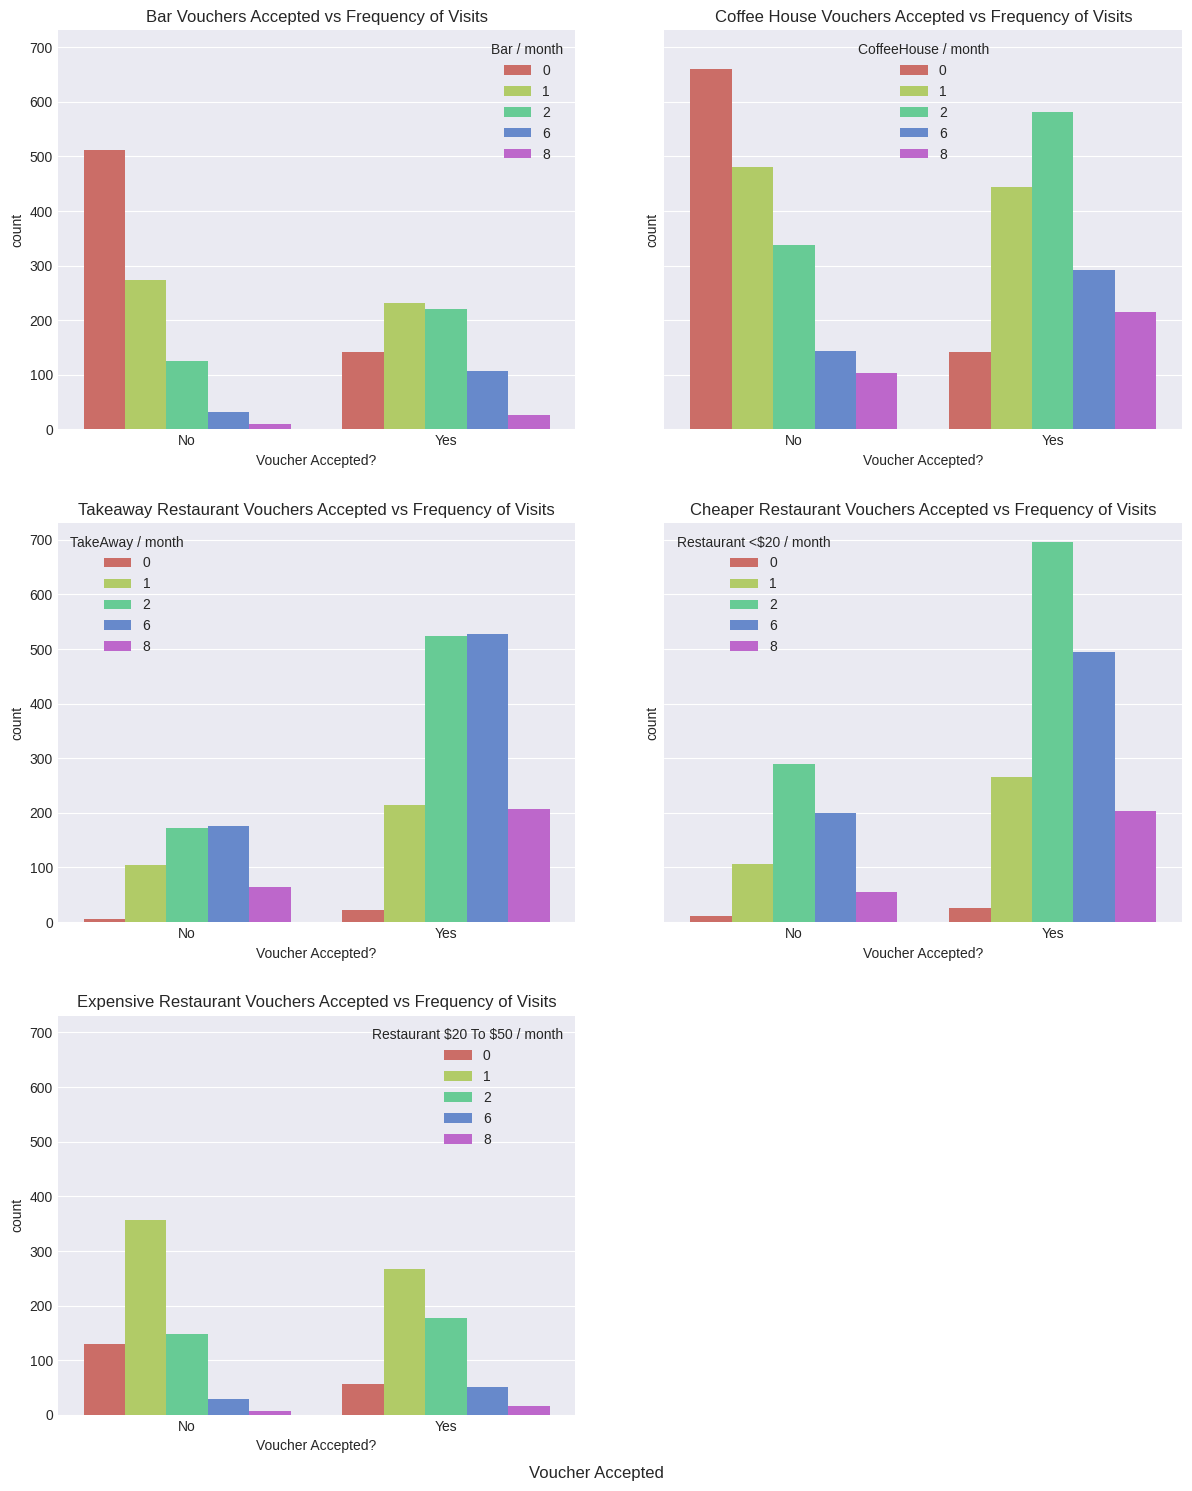

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15), sharey=True)
# delete extra figure #6
fig.delaxes(ax[2,1])

# create seaborn countplot for each category, and rename legend box title & x axis tick labels
sns.countplot(data=Bar_df, x='Y', hue='Bar', palette='hls', ax=ax[0, 0]).set(title='Bar Vouchers Accepted vs Frequency of Visits', xlabel='Voucher Accepted?')
ax[0, 0].get_legend().set_title("Bar / month")
ax[0, 0].set_xticks(ax[0, 0].get_xticks())
ax[0, 0].set_xticklabels(['No', 'Yes'])

sns.countplot(data=CoffeeHouse_df, x='Y', hue='CoffeeHouse', palette='hls', ax=ax[0, 1]).set(title='Coffee House Vouchers Accepted vs Frequency of Visits', xlabel='Voucher Accepted?')
ax[0, 1].get_legend().set_title("CoffeeHouse / month")
ax[0, 1].set_xticks(ax[0, 1].get_xticks())
ax[0, 1].set_xticklabels(['No', 'Yes'])

sns.countplot(data=Takeaway_df, x='Y', hue='CarryAway', palette='hls', ax=ax[1, 0]).set(title='Takeaway Restaurant Vouchers Accepted vs Frequency of Visits', xlabel='Voucher Accepted?')
ax[1, 0].get_legend().set_title("TakeAway / month")
ax[1, 0].set_xticks(ax[1, 0].get_xticks())
ax[1, 0].set_xticklabels(['No', 'Yes'])

sns.countplot(data=Restaurantlessthan20_df, x='Y', hue='RestaurantLessThan20', palette='hls', ax=ax[1, 1]).set(title='Cheaper Restaurant Vouchers Accepted vs Frequency of Visits', xlabel='Voucher Accepted?')
ax[1, 1].get_legend().set_title("Restaurant <\\$20 / month")
ax[1, 1].set_xticks(ax[1, 1].get_xticks())
ax[1, 1].set_xticklabels(['No', 'Yes'])

sns.countplot(data=Restaurantbetween2050_df, x='Y', hue='Restaurant20To50', palette='hls', ax=ax[2, 0]).set(title='Expensive Restaurant Vouchers Accepted vs Frequency of Visits', xlabel='Voucher Accepted?')
ax[2, 0].get_legend().set_title("Restaurant \\$20 To \\$50 / month")
ax[2, 0].set_xticks(ax[2, 0].get_xticks())
ax[2, 0].set_xticklabels(['No', 'Yes'])

# set title on x axis for subplots
fig.supxlabel('Voucher Accepted')

# adjust the subplots param for cleaner figure presentation
fig.tight_layout(pad=1, w_pad=5, h_pad=2.5);

#### <center>Figure 7. Voucher Accepted by Frequency of Visits</center>

According to figure 7, it can be concluded that vouchers are more attractive to people with a stronger demand, e.g. at least two visits per week. There is a significant increase in the number of people who have the demand to accept vouchers, in comparison to those who do not. Those without a need, for example, who do not visit Coffee Houses, vouchers are hardly attractive.

A similar chart distribution structure for the five segments means that the target population has similar characteristics. Based on the distribution structure of the charts, they can be divided into three categories.

Category one is __bars and coffee Houses__, both of which have a similar distribution structure, with a stepped drop for those who accept vouchers and a peak for those who do not. It can be seen that this type of shop __can only attract people with a specific drinking habit__.

Category two is __takeaway restaurants and cheaper restaurants__. both graphs show a peak shape, almost a normal distribution, implying that __people generally have this type of demand__.

Category three is __expensive restaurants__, both graphs show a mountain peak, but the median is smaller than the second category. This indicates that __people go to expensive restaurants less often__.

<a id=18></a>
# <center>4. Predictive Models</center> <a id=”13”></a>
There are three models created, using __Decision Tree Classifier__, __Random Forest Classifier__, and __K Nearest Neighbors Classifiers__. After predicting the results with the models, we used sklearn's __classification report and confusion matrix__ to evaluate each model, and also __studied the significant attributes__ for DecisionTree and RandomForest model.

<a id=19></a>
## 4.1 Importing ML Libraries

In [24]:
from sklearn.model_selection import train_test_split

from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import tree
from sklearn.tree import export_text

Before building the model, we dropped some of the attributes and created a new dataset for predictive models. These attributes were not dropped in the first place because we still wanted to explore the relationship between them and the outcome. Furthermore, these attributes are in different data types (e.g. non-numerical), which makes the model building process hard.

In [25]:
# dropping 
df_model = df.drop(columns=['passanger', 'coupon', 'maritalStatus', 'education', 'occupation', 'direction_same', 'direction_opp'])

# assign dependent and independent variables
x1 = df_model.drop(columns="Y")
y1 = df_model["Y"]

<a id=20></a>
## 4.2  Model #1 - Decision Tree Model

Since our dataset have __large number of records__, we decided to use the __60-40 split__ method to create the training and testing dataset

In [26]:
# split into training and testing datset
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.4, random_state = 42)

clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)

# Fit DecisionTreeClassifier
clf.fit(X_train, y_train)

# Predict the test set labels
y_pred = clf.predict(X_test)

DecisionTreeClassifier(max_depth=10, random_state=42)

### Evaluation of  Model #1

In [27]:
# accuracy score
print("Accuracy Score: {0}".format(metrics.accuracy_score(y_test, y_pred)))
# report with more detail
print(classification_report(y_test, y_pred))

Accuracy Score: 0.6165184838558727
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      1826
           1       0.65      0.71      0.68      2448

    accuracy                           0.62      4274
   macro avg       0.60      0.60      0.60      4274
weighted avg       0.61      0.62      0.61      4274



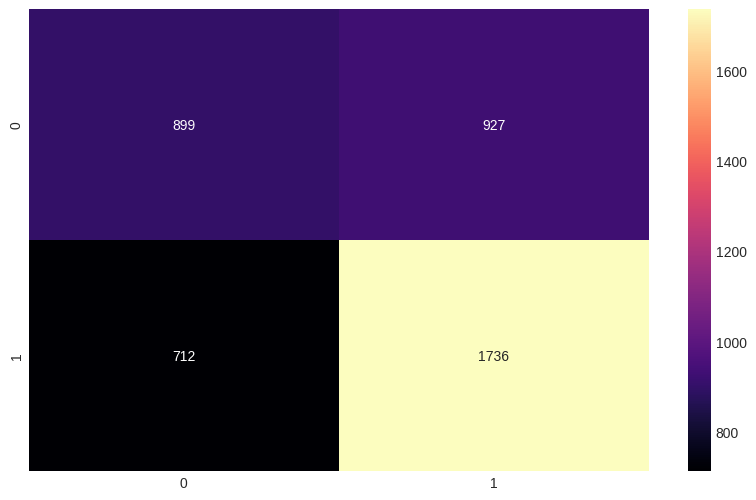

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma");

plt.show();

#### <center>Figure 8. Confusion Matrix of Decision Tree Model</center>

[Text(2, 0, '0.146022'),
 Text(2, 0, '0.137278'),
 Text(2, 0, '0.124248'),
 Text(2, 0, '0.122456'),
 Text(2, 0, '0.100471'),
 Text(2, 0, '0.0989228'),
 Text(2, 0, '0.0839768'),
 Text(2, 0, '0.0819539'),
 Text(2, 0, '0.0691448'),
 Text(2, 0, '0.035526')]

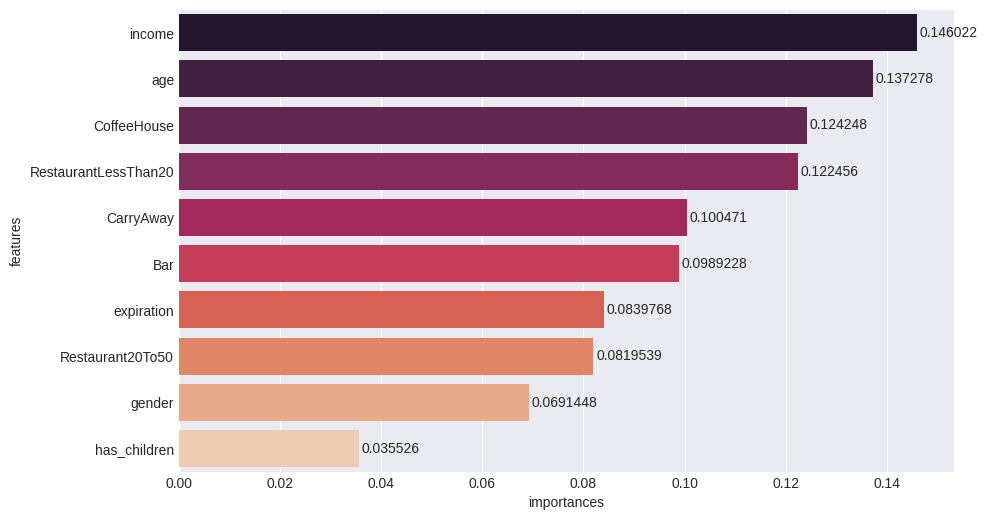

In [29]:
features_df = pd.DataFrame({'features': clf.feature_names_in_, 'importances': clf.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")

# add value label to each bar
for value in g.containers:
    g.bar_label(value, padding=2)

#### <center>Figure 9. Variable Significance of Decision Tree Model</center>

<a id=21></a>
## 4.3 Model #2 - Random Forest

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.4, random_state = 42)

rfc = RandomForestClassifier(random_state=42)

# Fit RandomForestClassifier
rfc.fit(X_train, y_train)

# Predict the test set labels
y_pred = rfc.predict(X_test)

RandomForestClassifier(random_state=42)

### Evaluation of  Model #2

In [31]:
# accuracy score
print("Accuracy Score: {0}".format(metrics.accuracy_score(y_test, y_pred)))
# report with more detail
print(classification_report(y_test, y_pred))

Accuracy Score: 0.628451099672438
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1826
           1       0.66      0.71      0.69      2448

    accuracy                           0.63      4274
   macro avg       0.62      0.61      0.61      4274
weighted avg       0.62      0.63      0.63      4274



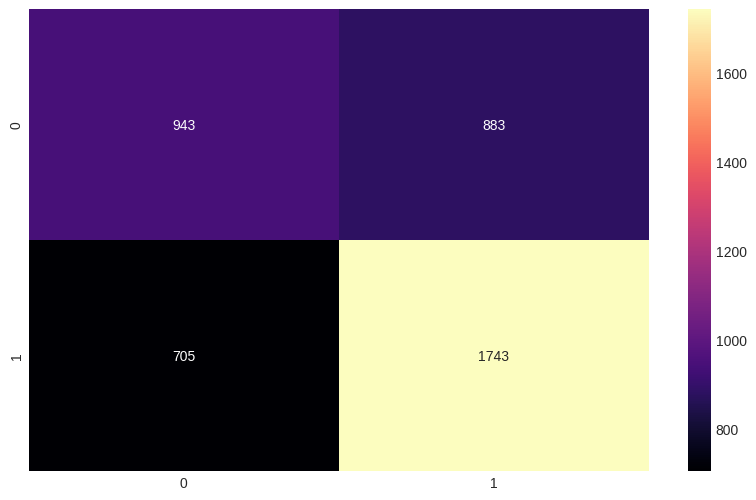

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma");

plt.show();

#### <center>Figure 10. Confusion Matrix of Random Forest Model</center>

[Text(2, 0, '0.168955'),
 Text(2, 0, '0.141848'),
 Text(2, 0, '0.121716'),
 Text(2, 0, '0.106031'),
 Text(2, 0, '0.10011'),
 Text(2, 0, '0.0985705'),
 Text(2, 0, '0.0943732'),
 Text(2, 0, '0.0816401'),
 Text(2, 0, '0.045082'),
 Text(2, 0, '0.0416738')]

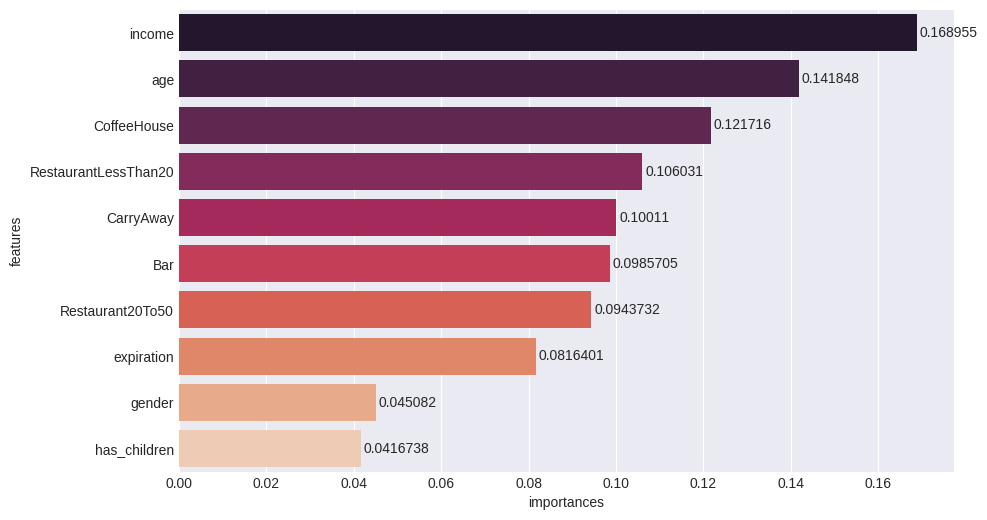

In [33]:
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")

# add value label to each bar
for value in g.containers:
    g.bar_label(value, padding=2)

#### <center>Figure 11. Variable Significance of Random Forest Model</center>

<a id=22></a>
## 4.3 Model #3 - K Nearest Neighbors Classifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.4, random_state = 42)

knn_model=neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

KNeighborsClassifier()

### Evaluation of  Model #3

In [35]:
# accuracy score
print("Accuracy Score: {0}".format(metrics.accuracy_score(y_test, y_pred)))
# report with more detail
print(classification_report(y_test, y_pred))

Accuracy Score: 0.6158165652784277
              precision    recall  f1-score   support

           0       0.55      0.52      0.54      1826
           1       0.66      0.69      0.67      2448

    accuracy                           0.62      4274
   macro avg       0.61      0.60      0.60      4274
weighted avg       0.61      0.62      0.61      4274



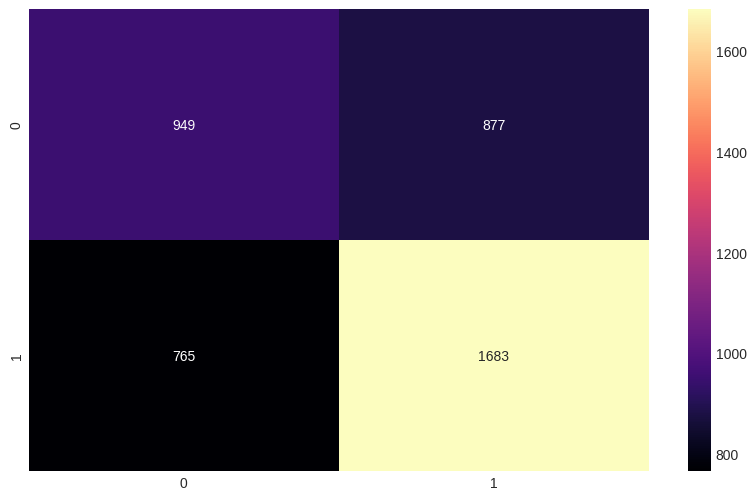

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma");

plt.show();

#### <center>Figure 12. Confusion Matrix of K Nearest Neighbors Model</center>

<a id=23></a>
## 4.4 Evaluation and Insights
After evaluating the three models with the help of classification report and confusion matrix, it is clear that Model #2 - __Random Forest performed the best__, with a slightly higher accuracy score compared to the other two.

Based on figure 8, 10, and 12, __K Nearest Neighbors__ model is __better at predicting True Negative values__ then Decision Tree model and Random Forest model. 

Looking at figure 9 and 11, __'income' and 'age'__ are the __most significant attributes__ in both the Decision Tree and Random Forest model. This indicates that an individual's income and age is more likely to affect their acceptance rate of coupons.

### Limitations
However, the reason for 'income' and 'age' to be the most significant attributes could be that they have the most diversed values, whereas the attributes only have less than five values (e.g. 'Bar' only have [0, 1, 3, 6, 8], 'expiration' only have [2, 24]).
In addtion, __all the attributes only have less than 20% importance to the model__. To improve the accuracy of the models, the quality of data need to be improved. For example, income should not be different ranges that survey respondents choose from, but rather ask them to estimate their yearly salary.
__Some of the non-numerical attributes have been dropped__ before training the model, which __might have been the important feature__ for the models. Thus, in the future, these attributes could all be transformed into numerical or categorical values in some way, and improve the models.

<a id=24></a>
# <center>5. Conclusion and Business Recommendations</center>
<a id=25></a>
## 5.1 Conclusion
- __Income and Age is the most dominant factor__ of coupon acceptance rate
- Consumers within the __income level of \\$12500 to \\$62500__ are __70%+ likely to accept coupons__
- Students are __63% likely to accept coupons__ 
- Consumers __prefer__ coupons from __takeaway restaurants and cheaper restuarants__ (less than \\$20 average spend per person), with an average of __75% and 72% acceptance rate__
- __46%__ of consumers __rejected__ coupons from __expensive restaurants__ (\\$20 to \\$50 average spend per person)
- The __model can predict the acceptance rate of coupons__ based on factors such as income, age, frequency of business type visits, coupons expiration, gender, and whether they have childrens, with around __63% accuracy__

<a id=26></a>
## 5.2 Recommendations
Local businesses can __utilise the findings__ to better __target consumers__ and give out coupons. 

In addition, they can __collaborate with online third parties__ such as __restaurant booking platforms__, where these platforms will have the database with customer data, and able to fully utilise the model created in this report to better target users and give out local businesses' coupons.

<a id=27></a>
## 5.3 Next Steps
- Study how accompanies affects coupons acceptance (alone, with friend, or with children)
- Come up with ways to convert the dropped attributes to numerical/categorical values and include them in the models
- Collect more data to fit the model and improve its performance

<a id=28></a>
# <center>6. References for External Resources</center>
1. Department, E.D. (no date) Calculator - unemployment benefits. Available at: https://edd.ca.gov/en/Unemployment/UI-Calculator (Accessed: December 8, 2022). 
1. Landup, D. (2022) Definitive guide to the random forest algorithm with Python and Scikit-Learn, Stack Abuse. Stack Abuse. Available at: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/ (Accessed: December 10, 2022). 
1. Simplilearn (2022) Sklearn decision trees: Step-by-step guide: Sklearn Tutorial, Simplilearn.com. Simplilearn. Available at: https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-decision-trees (Accessed: December 11, 2022). 
1. Agrawal, S. (2021) Understanding the confusion matrix from Scikit learn, Medium. Towards Data Science. Available at: https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79 (Accessed: December 12, 2022). 
1. Uddin, S. et al. (2022) Comparative performance analysis of K-nearest neighbour (KNN) algorithm and its different variants for disease prediction, Nature News. Nature Publishing Group. Available at: https://www.nature.com/articles/s41598-022-10358-x (Accessed: December 12, 2022). 
1. Mansoori, J. (2021) How to evaluate and improve Knn classifier part 3, Medium. Medium. Available at: https://medium.com/@jalalmansoori/how-to-evaluate-and-improve-knn-classifier-part-3-62d72fd17eec (Accessed: December 12, 2022). 
1. Ng, R. (no date) K-Nearest Neighbors (KNN) classification model, ritchieng.github.io. Available at: https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/ (Accessed: December 12, 2022). 
1. Abraham, J. (2019) A beginner's Guide to K Nearest Neighbor(KNN) algorithm with code, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/a-beginners-guide-to-k-nearest-neighbor-knn-algorithm-with-code-5015ce8b227e (Accessed: December 18, 2022). 

<a id=29></a>
# <center>7. Appendix</center>

In [38]:
from util1 import wordcount
count = wordcount('MSIN0143_2022_GROUP_IMB_G.ipynb')
print("total wordcount: {0}".format(count - 180 - 92 - 211)) # minus wordcount from reference, graph footnote, and table of contents & internal links
# wordcount still includes titles and subtitles
## original wordcount is 2260 (with reference and footnote and TOF & internal links)

total wordcount: 1950
